# AI4Omics Practical Session

## Task 1 -  Introduction to classification models in machine learning

## 1. Import data

Import `pandas` package which allows us to perform data analysis and manipulation of dataframes in Python.

In [1]:
import pandas as pd

The data are available in the file `colon_cancer.csv`. Data import is done with the pandas `read_csv` command. The `shape` attribute contains the dimensions of the dataframe.

In [2]:
data = pd.read_csv('../data/colon_cancer.csv', sep=';', index_col='id_sample')
print('data', data.shape)

data (804, 61)


The `head()` method displays by default the first 5 lines of the dataframe. If necessary, we can indicate the number of lines to display, for example `head(3)` for 3 lines.

In [3]:
data.head()

,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,TENT5C,...,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4,tissue_status
id_sample,,,,,,,,,,,,,,,,,,,,,
EPSM-COLON-0001,9.199944,6.090054,7.062512,3.864253,7.869368,8.465133,1.174665,0.975086,3.028995,6.350919,...,5.528372,3.500730,2.893760,5.130743,1.485110,1.830484,6.379933,3.919293,3.031413,normal
EPSM-COLON-0002,7.767618,6.027985,6.318818,3.069581,6.410334,8.159814,5.959414,1.625518,2.984629,4.686086,...,5.671788,4.658790,4.715374,5.438104,2.131466,2.097157,6.863173,0.322829,3.978531,normal
EPSM-COLON-0003,7.918904,5.885948,6.917742,3.188257,7.915549,8.004194,1.560386,2.379909,2.929762,4.281126,...,4.596079,5.649376,4.047899,6.580938,1.447209,3.890943,6.209704,3.274407,3.714491,normal
EPSM-COLON-0004,9.053553,6.027985,7.081085,2.357523,5.657726,8.004194,3.548988,3.260031,3.313829,4.821072,...,4.135061,5.437107,4.537381,4.615263,1.004454,1.840902,6.774063,3.320525,3.080796,normal
EPSM-COLON-0005,6.027822,5.791257,5.937685,4.137667,5.818999,8.056067,3.307945,5.208874,4.191695,5.181036,...,3.674043,6.286182,4.715374,4.432410,0.159195,3.506561,6.150297,0.461184,5.140305,normal


The data contain the expression levels of **60 genes** in **804 samples** of colon tissue. The last column `tissue_status` indicates if the sample is normal or tumoral.

The data types of each column can be displayed with `dtypes`.

In [4]:
data.dtypes

ADH1C            float64
DHRS11           float64
UGP2             float64
SLC7A5           float64
CTSS             float64
                  ...   
GAL              float64
CRYL1            float64
YBX2             float64
ANGPTL4          float64
tissue_status     object
Length: 61, dtype: object

We can see that the data are mostly *float values* except for `tissue_status` which is actually a *string*, considered as an *object* by pandas.

The `describe` method displays descriptive statistics of numerical data only. The `tissue_status` column will not be included.

In [5]:
data.describe()

,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,TENT5C,...,SYTL2,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,...,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,5.588943,4.354817,5.557694,4.513570,6.717535,7.218184,2.737937,2.806573,3.064394,3.658318,...,3.599294,4.682718,4.225014,4.575397,4.097244,1.823268,2.822931,6.096634,2.801603,2.596452
std,2.889901,1.431179,1.150565,1.614450,1.077821,1.411969,1.466906,1.243826,1.191486,1.258059,...,1.054504,0.917027,1.656088,0.859138,1.276589,0.721587,1.338349,0.840122,1.011971,1.000962
min,0.610504,1.427079,2.027201,1.685024,3.668691,1.164886,0.716737,0.368200,0.610504,0.858074,...,1.286220,1.868389,0.637047,2.250347,1.015235,0.118945,0.610504,2.031471,0.000000,0.757246
25%,3.174250,3.118844,4.611060,3.030022,6.065937,6.241714,1.550382,1.864561,2.198244,2.655091,...,2.878356,4.349295,2.921069,3.958903,3.131267,1.337715,1.840902,5.489589,2.277491,1.824823
50%,5.467024,4.125990,5.412204,4.382953,6.762908,7.578782,2.297732,2.741509,2.900393,3.605686,...,3.613342,4.869313,4.116251,4.537381,3.975276,1.689671,2.591044,6.150297,2.905605,2.442378
75%,8.444756,5.696566,6.556969,5.918848,7.485487,8.263561,3.669509,3.574304,3.752899,4.686086,...,4.417632,5.249372,5.507864,5.070072,5.118110,2.211967,3.661012,6.728052,3.505721,3.139738
max,10.263846,7.022241,7.571114,8.059430,8.990703,10.079135,6.682541,6.591924,6.276628,6.350919,...,5.713776,7.029946,9.045672,7.647284,7.129499,4.763212,7.545757,8.723941,5.169059,6.493643


## 2. Display distributions of expression levels

To create graphical plots we will use the graphical packages of Python `matplotlib` and `seaborn`.

In [6]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

The `displot` command of the `seaborn` package enables us to display a distribution of values (as a kernel density estimator *kde* or as a histogram *hist*). Let's select one gene, for example *DAO*, and plot the distribution of expression levels of this gene across all samples. 

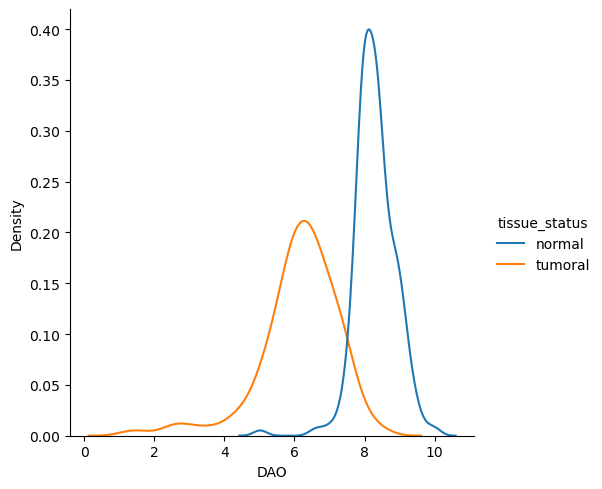

In [7]:
selected_gene = 'DAO'
sns.displot(data=data, x=selected_gene, hue='tissue_status', kind='kde')

The gene *DAO* is highly expressed in normal samples while its expression in tumour samples is much lower.

We can intuitively feel that if we introduce a certain threshold for *DAO* expression, for example 7.5, we will be able to predict for any new sample if it is normal or tumoral. For this, we just need to measure the level of *DAO* expression in the new sample. If it is below 7.5 than the sample is tumoral, otherwise it is normal.   

## 3. Create features and targets for machine learning 

For machine learning purposes in Python, we usually prepare data in two separate objects:
- The first object is a matrix (or a dataframe) of *data*, typically named  **X**, which contains the measurements for all available variables (features). In our case, the features are the 60 genes. The dataframe **X** contains the expression levels of these genes (features).
- The second object is a list of *targets* that we aim to predict, named **y**. In our example, it corresponds to the column `tissue_status` containing the types of each sample, normal tissue or cancer.

Let's consider a simple case when we have only one gene *DAO*. What would be the data **X** and the targets **y**?  

In this case, we have only one feature, the gene *DAO*. The dataframe **X** will therefore contain the expression levels of this gene in all the samples.

In [8]:
features = ['DAO']
X = data[features] # dataframe (pandas)
X.head(3)

,DAO
id_sample,
EPSM-COLON-0001,8.465133
EPSM-COLON-0002,8.159814
EPSM-COLON-0003,8.004194


The targets **y** correspond to the column `tissue_status` containing the types of each sample. It can be implemented as a *list* in Python or a *numpy.array* or a *pandas.Series*. We will use the last option.

In [9]:
y = data['tissue_status'] # series (pandas)
print(y)

id_sample
EPSM-COLON-0001     normal
EPSM-COLON-0002     normal
EPSM-COLON-0003     normal
EPSM-COLON-0004     normal
EPSM-COLON-0005     normal
                    ...   
EPSM-COLON-0800    tumoral
EPSM-COLON-0801    tumoral
EPSM-COLON-0802    tumoral
EPSM-COLON-0803    tumoral
EPSM-COLON-0804    tumoral
Name: tissue_status, Length: 804, dtype: object


## 4. Create training and test datasets

In a machine learning approach, it is mandatory to split the initial dataset **X** into two datatsets: one dataset **X_train** will be used to train the model and the other **X_test** to test its efficiency. The samples for these datasets will be selected randomly.

To create the datasets **X_train** and **X_test**, we will use the framework `scikit-learn` which contains a dedicated tool `train_test_split`.

In [10]:
from sklearn.model_selection import train_test_split

Let's use 2/3 of samples from the original dataset **X** as a training set **X_train**, and another 1/3 of samples as a test set **X_test**.

<img src="train_test_split.png" alt="Splitting original dataset in training and test" width="400" aling="center">

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)
print('Train dataset:', X_train.shape, 'Test dataset:', X_test.shape)

Train dataset: (536, 1) Test dataset: (268, 1)


We automatically generated **X_train** and **X_test** datasets with their corresponding targets **y_train** and **y_test**. 

The option `random_state` in `train_test_split` initializes a random generator. The option `stratify` indicates that the proportions of tumour and normal samples in both **X_train** and **X_test** datasets should be the same as in the initial dataset **X** (50/50 in our case). 

Now, if we display the samples included in the training dataset **X_train**, we can see that the initial samples have been shuffled and randomly selected. The order of samples from the original dataset **X** is not conserved.

In [12]:
X_train.head(3)

,DAO
id_sample,
EPSM-COLON-0782,5.458151
EPSM-COLON-0754,6.173560
EPSM-COLON-0577,6.870016


Same for **X_test**.

In [13]:
X_test.head(3)

,DAO
id_sample,
EPSM-COLON-0691,6.543940
EPSM-COLON-0435,7.598907
EPSM-COLON-0508,4.271774


## 5. Training a Decision Tree

A decision tree during the training step search for an optimal threshold that allows to separate normal and tumour samples. The `max_depth` option indicates the maximum depth of the tree. The `fit` method performs the training of the model. The training of the model is done only on the training dataset **X_train**.

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=1, random_state=42, criterion='entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)

It could be interesting to display the optimal threshold found by the algorithm during the learning process. We can do it with the `export_text` function.

In [15]:
from sklearn.tree import export_text, plot_tree
decision_tree_text = export_text(classifier, feature_names=list(X_train.columns))
print(decision_tree_text)

|--- DAO <= 7.54
|   |--- class: tumoral
|--- DAO >  7.54
|   |--- class: normal



We can also visualize the obtained decision tree when it is not too complex. The `plot_tree` function generates the graph.

[Text(0.5, 0.75, 'DAO <= 7.54\nentropy = 1.0\nsamples = 536\nvalue = [268, 268]\nclass = normal'),
 Text(0.25, 0.25, 'entropy = 0.25\nsamples = 265\nvalue = [11, 254]\nclass = tumoral'),
 Text(0.75, 0.25, 'entropy = 0.29\nsamples = 271\nvalue = [257, 14]\nclass = normal')]

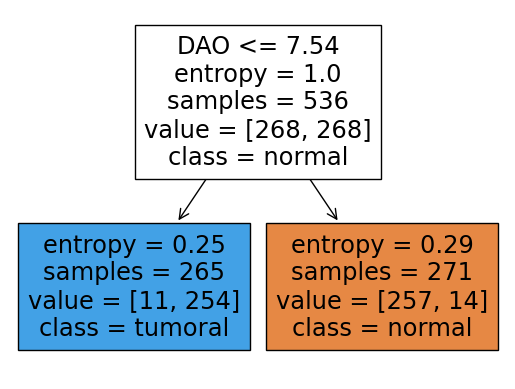

In [16]:
plot_tree(classifier, feature_names=list(X_train.columns),  class_names=y.unique(), precision=2, filled=True)

## 6. Predict the diagnosis of new patients (test dataset) 

Once the model has been trained, it can be used on new samples to predict their status (normal or tumour). The performance of the model is usually estimated by a metric. In our example, we will use the *accuracy* metric.

**Accuracy** = Number of correct predictions / Total number of predictions

The prediction can be done with the `predict` method. In `scikit-learn`,  all the supervised machine learning models have at leat two standard methods: `fit` to train the model (on train dataset) and `predict` to perform a prediction (on test dataset).

In [17]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

The accuracy calculation is available in `metrics` module of `scikit-learn`.

In [18]:
from sklearn import metrics
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
print('Train accuracy:', '{:.2f}'.format(accuracy_train), 'Test accuracy:', '{:.2f}'.format(accuracy_test))

Train accuracy: 0.95 Test accuracy: 0.93


To **evaluate a model**, we essentially take into account the **metric calculated on the test dataset**. Sometimes, we can also compare it with the metric obtained on the training dataset to know if the model tends to overfit.

## 7. Create a function that performs all steps

Subsequently, in the following exercises we will often perform the training, prediction and metric calculation steps for different machine learning models. It will be more convenient for us to create a special `calculate_accuracy` function that performs all these steps automatically.

In [19]:
def calculate_accuracy(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)
    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
    print('Train accuracy:', '{:.2f}'.format(accuracy_train), 'Test accuracy:', '{:.2f}'.format(accuracy_test))
    return accuracy_train, accuracy_test, classifier

Example of use: 

In [20]:
accuracy_train, accuracy_test, trained_classifier = calculate_accuracy(classifier, X_train, X_test, y_train, y_test)

Train accuracy: 0.95 Test accuracy: 0.93


*Disclaimer! The function* `calculate_accuracy` *is proposed here to simplify the code of the lesson, for teaching purposes only. In this example, it is convenient for us to add all the steps in the same function. Nevertheless, if you need to produce a professional code for production purposes, please take into account good practices of software engineering. Usually, the good practices recommend to separate different actions in different atomic functions and don't mix the calculation and the presentation of data/results. A concrete approach may depend on the programming paradigm.*

**Congratulations, you successfully completed the task 1! Please, proceed to the task 2.**